# GSOM 23SM1 ML Hometask 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

sns.set_palette('muted') 
sns.set_color_codes('muted')
sns.set_style('white') 

import warnings
warnings.filterwarnings('ignore')

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
!pip install xgboost

In [4]:
!pip install lightgbm

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn_pandas import DataFrameMapper

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

# 0.

In [6]:
data = pd.read_csv('car_train.csv')
data.sample(5)

,id,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),price
51944,51944,toyota,Aygo,2017.0,Manual,14513 km,Other,0.0,68.9,1.0,NaN,8490
8276,8276,Mercedes-Benz,GLC Class,2018.0,Automatic,25046 km,Diesel,145.0,56.5,2.1,NaN,24750
63594,63594,bmw,1 Series,2016.0,Manual,45719 km,Diesel,0.0,83.1,1.5,NaN,9500
30649,30649,toyota,RAV4,2017.0,Automatic,10028 km,Petrol,145.0,43.5,2.0,NaN,19998
75061,75061,audi,TT,2016.0,Semi-Auto,16000 km,Petrol,300.0,34.0,2.5,NaN,39995


In [5]:
print(data.ndim)
print(data.shape)
print(data.size)

2
(98948, 12)
1187376


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98948 entries, 0 to 98947
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            98948 non-null  int64  
 1   brand         98948 non-null  object 
 2   model         98948 non-null  object 
 3   year          98939 non-null  float64
 4   transmission  98948 non-null  object 
 5   mileage       98948 non-null  object 
 6   fuelType      98948 non-null  object 
 7   tax           85970 non-null  float64
 8   mpg           90426 non-null  float64
 9   engineSize    98948 non-null  float64
 10  tax(£)        4456 non-null   float64
 11  price         98948 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 9.1+ MB


In [7]:
data.describe()

,id,year,tax,mpg,engineSize,tax(£),price
count,98948.000000,98939.000000,85970.000000,90426.000000,98948.000000,4456.000000,98948.000000
mean,49473.500000,2017.095331,120.248924,55.171346,1.661181,120.828097,16882.304453
std,28563.971555,2.138149,63.467639,16.098416,0.556509,58.352896,9744.497982
min,0.000000,1970.000000,0.000000,0.300000,0.000000,0.000000,-695.000000
25%,24736.750000,2016.000000,125.000000,47.100000,1.200000,125.000000,10200.000000
50%,49473.500000,2017.000000,145.000000,54.300000,1.600000,145.000000,14691.000000
75%,74210.250000,2019.000000,145.000000,62.800000,2.000000,145.000000,20899.000000
max,98947.000000,2060.000000,580.000000,470.800000,6.600000,555.000000,159999.000000


# 1. Values type & Missing values

## 1.1. Values type

### `mileage`

In [7]:
# getting rid of 'km' in mileage
data.mileage = data.mileage.str.replace(" km", '').astype(int)

### `model`

In [9]:
data.model.value_counts().index

Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' Corsa', ' Polo', ' Astra',
       ' A Class', ' 3 Series', ' Kuga',
       ...
       ' A2', '200', ' Transit Tourneo', ' RS7', '180', ' Ranger', ' Amica',
       '220', ' Accent', ' Escort'],
      dtype='object', length=194)

In [8]:
# getting rid of space in model
data.model = data.model.str.strip()

### `year`

In [9]:
# putting a correct year
data.loc[data.year == 2060,'year'] = 2006

In [10]:
data.year = data[~data.year.isna()].year.astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98948 entries, 0 to 98947
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            98948 non-null  int64  
 1   brand         98948 non-null  object 
 2   model         98948 non-null  object 
 3   year          98939 non-null  float64
 4   transmission  98948 non-null  object 
 5   mileage       98948 non-null  int64  
 6   fuelType      98948 non-null  object 
 7   tax           85970 non-null  float64
 8   mpg           90426 non-null  float64
 9   engineSize    98948 non-null  float64
 10  tax(£)        4456 non-null   float64
 11  price         98948 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 9.1+ MB


### `mpg`

In [12]:
# getting rid of obvious error in 'mpg' and 'engineSize'
data = data.drop(data[data.mpg < 15].index)
data = data.drop(data[data.engineSize < 0.1].index)
data

,id,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),price
0,0,vauxhall,Astra,2017.0,Manual,19000,Diesel,20.0,72.4,1.6,NaN,10095
1,1,ford,Focus,2017.0,Manual,26973,Petrol,145.0,57.7,1.0,NaN,11999
2,2,Mercedes-Benz,A Class,2019.0,Manual,2078,Petrol,145.0,47.1,1.3,NaN,23299
3,3,toyota,Aygo,2016.0,Manual,20169,Petrol,0.0,69.0,1.0,NaN,6698
4,4,bmw,4 Series,2016.0,Manual,97706,Diesel,30.0,62.8,2.0,NaN,11250
...,...,...,...,...,...,...,...,...,...,...,...,...
98943,98943,audi,A8,2018.0,Automatic,4284,Petrol,145.0,37.7,3.0,NaN,38500
98944,98944,vauxhall,Mokka X,2019.0,Manual,9558,Petrol,145.0,39.2,1.4,NaN,14298
98945,98945,vw,Passat,2016.0,Manual,51241,Diesel,20.0,68.9,2.0,NaN,11995
98946,98946,bmw,5 Series,2012.0,Automatic,129000,Diesel,165.0,51.4,3.0,NaN,9499


## 1.2. Missing values

In [13]:
# percentage of missing data
(data.isna().sum() / len(data)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
id,0.00%
brand,0.00%
model,0.00%
year,0.01%
transmission,0.00%
mileage,0.00%
fuelType,0.00%
tax,13.10%
mpg,8.63%
engineSize,0.00%


In [14]:
# dropping 'tax(£)' and 'id'
data=data.drop(columns = ['tax(£)', 'id']) 

## 1.3. Analysis afterwards

In [43]:
data.describe()

,id,year,tax,mpg,engineSize,tax(£),price
count,98948.000000,98939.000000,85970.000000,90426.000000,98948.000000,4456.000000,98948.000000
mean,49473.500000,2017.095331,120.248924,55.171346,1.661181,120.828097,16882.304453
std,28563.971555,2.138149,63.467639,16.098416,0.556509,58.352896,9744.497982
min,0.000000,1970.000000,0.000000,0.300000,0.000000,0.000000,-695.000000
25%,24736.750000,2016.000000,125.000000,47.100000,1.200000,125.000000,10200.000000
50%,49473.500000,2017.000000,145.000000,54.300000,1.600000,145.000000,14691.000000
75%,74210.250000,2019.000000,145.000000,62.800000,2.000000,145.000000,20899.000000
max,98947.000000,2060.000000,580.000000,470.800000,6.600000,555.000000,159999.000000


In [44]:
data.describe(include = 'object')

,brand,model,transmission,mileage,fuelType
count,98948,98948,98948,98948,98948
unique,9,194,4,40568,5
top,ford,Focus,Manual,10 km,Petrol
freq,21335,9116,55883,772,54576


In [45]:
data.select_dtypes('number').astype(str).describe()

,id,year,tax,mpg,engineSize,tax(£),price
count,98948,98948,98948,98948,98948,98948,98948
unique,98948,30,48,207,42,25,12712
top,0,2019.0,145.0,nan,2.0,nan,9995
freq,1,27283,42094,8522,26897,94492,557


# 2. Train & Test Samples Splitting

In [15]:
X, y = data.drop(columns = ['price']), data.price

In [16]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 4, shuffle=False)

# 3. Mapper & Pipeline & GridSearch & RandomSearch

In [18]:
numeric_features = X.select_dtypes('number').columns.tolist()
nominal_features = X.select_dtypes(object).columns.tolist()

**Note:** the pipeline needs optimal parameters to be found out - see below!

In [34]:
mapper = DataFrameMapper([([feature], SimpleImputer()) for feature in numeric_features] +\
                         [([feature], OneHotEncoder(handle_unknown = 'ignore')) for feature in nominal_features],
                             df_out=True)

pipeline = Pipeline(steps = [('preprocessing', mapper), 
                             ('scaler', StandardScaler()),
                             ('xgb', xgb.XGBRegressor(objective="reg:linear", random_state=42,\
                                                      n_estimators = 500, eta = 0.3, max_depth = 7))])
                             
                             #('xgb', xgb.XGBRegressor(objective="reg:linear", random_state=42))])

        

pipeline

Pipeline(steps=[('preprocessing',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['year'], SimpleImputer()),
                                           (['mileage'], SimpleImputer()),
                                           (['tax'], SimpleImputer()),
                                           (['mpg'], SimpleImputer()),
                                           (['engineSize'], SimpleImputer()),
                                           (['transmission'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['brand'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['model'],
                                            OneH...
                              eval_metric=None, feature_types=None, gamma=None,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              objective='reg:linear', ...))])

## 3.1. GridSearch

In [22]:
param_grid = {    
    'xgb__n_estimators': [300, 500, 700],
    'xgb__learning_rate': [0.1, 0.3, 0.5],
    'xgb__max_depth': [3, 5, 7]}

In [30]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

CPU times: user 17 µs, sys: 2 µs, total: 19 µs
Wall time: 23.1 µs


In [31]:
%%time
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[23:17:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END xgb__learning_rate=0.3, xgb__max_depth=7, xgb__n_estimators=500; total time=13.5min
[23:17:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END xgb__learning_rate=0.3, xgb__max_depth=7, xgb__n_estimators=700; total time=17.4min
[23:42:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:17:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        DataFrameMapper(df_out=True,
                                                        drop_cols=[],
                                                        features=[(['year'],
                                                                   SimpleImputer()),
                                                                  (['mileage'],
                                                                   SimpleImputer()),
                                                                  (['tax'],
                                                                   SimpleImputer()),
                                                                  (['mpg'],
                                                                   SimpleImputer()),
                                                                  (['engineSize'],
                                                                   SimpleImputer()),
                                                                  (['transmission'],
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  (['brand'],
                                                                   OneHotEncoder(handle_unknow...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     objective='reg:linear',
                                                     predictor=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.3], 'xgb__max_depth': [7],
                         'xgb__n_estimators': [500, 700]},
             verbose=2)

In [32]:
grid_search.best_params_

{'xgb__learning_rate': 0.3, 'xgb__max_depth': 7, 'xgb__n_estimators': 500}

**Conclusion:** `best_params_` are `xgb__learning_rate`: 0.3, `xgb__max_depth`: 7, `xgb__n_estimators`: 500.

## 3.2. RandomSearch

**Note:** Let's try `RandomizedSearchCV()` method as an alternative to find out optimal parameters for the pipeline. 

In [23]:
param_grid = {'xgb__learning_rate': sp_randFloat(),
              'xgb__n_estimators' : sp_randInt(100, 1000),
              'xgb__max_depth'    : sp_randInt(4, 10)}
param_grid

{'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e8f7b4be0>,
 'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e8f917ca0>,
 'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_frozen at 0x7f7e904320d0>}

In [42]:
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions = param_grid,
                               cv = 2, n_iter = 10, n_jobs=-1)

In [43]:
%%time
random_search.fit(X_train, y_train)

[00:43:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[23:57:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:10:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[00:21:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regress

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('preprocessing',
                                              DataFrameMapper(df_out=True,
                                                              drop_cols=[],
                                                              features=[(['year'],
                                                                         SimpleImputer()),
                                                                        (['mileage'],
                                                                         SimpleImputer()),
                                                                        (['tax'],
                                                                         SimpleImputer()),
                                                                        (['mpg'],
                                                                         SimpleImputer()),
                                                                        (['engineSize'],
                                                                         SimpleImputer()),
                                                                        (['transmission'],
                                                                         OneHotEncoder(handle_unknown='ignore')),
                                                                        (['brand'],
                                                                         OneHotEncoder(handle_...
                                                           num_parallel_tree=None,
                                                           objective='reg:linear',
                                                           predictor=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd516a4bb20>,
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd516a4b190>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd516a6b070>})

In [44]:
random_search.best_params_

{'xgb__learning_rate': 0.1245908942211651,
 'xgb__max_depth': 6,
 'xgb__n_estimators': 949}

**Conclusion:** `best_params_` are `xgb__learning_rate`: 0.1245908942211651, `xgb__max_depth`: 6, `xgb__n_estimators`: 949. Unfortunately, evaluation metrics are a bit worse:
* LR RMSE train = 1410.647
* LR MAPE train = 0.062
* LR MAPE train = 0.062040872565346745
* LR SCORE = 0.979
-----
* LR RMSE test = 1937.712
* LR MAPE test = 0.072
* LR MAPE test = 0.0717721594943187
* LR SCORE = 0.961

Let's put in the pipeline `best_params_`: `xgb__learning_rate`: 0.3, `xgb__max_depth`: 7, `xgb__n_estimators`: 500.

## 3.3. `.fit(X_train, y_train)`

In [35]:
%%time
pipeline.fit(X_train, y_train)

[19:44:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 19min 6s, sys: 7.4 s, total: 19min 13s
Wall time: 5min 40s


Pipeline(steps=[('preprocessing',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['year'], SimpleImputer()),
                                           (['mileage'], SimpleImputer()),
                                           (['tax'], SimpleImputer()),
                                           (['mpg'], SimpleImputer()),
                                           (['engineSize'], SimpleImputer()),
                                           (['transmission'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['brand'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['model'],
                                            OneH...
                              eval_metric=None, feature_types=None, gamma=None,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              objective='reg:linear', ...))])

# 4. Evaluation of the model

## 4.1. Evaluation on the Train Sample

In [36]:
lr_train_pred = pipeline.predict(X_train)
lr_rmse = mean_squared_error(y_true=y_train, y_pred = lr_train_pred, squared=False)
lr_mape = mean_absolute_percentage_error(y_true=y_train, y_pred=lr_train_pred)

print (f'LR RMSE train = {round(lr_rmse, 3)}')
print (f'LR MAPE train = {lr_mape}')
print (f'LR SCORE = {round(pipeline.score(X_train, y_train), 3)}')

LR RMSE train = 1130.136
LR MAPE train = 0.05238567945433896
LR SCORE = 0.986


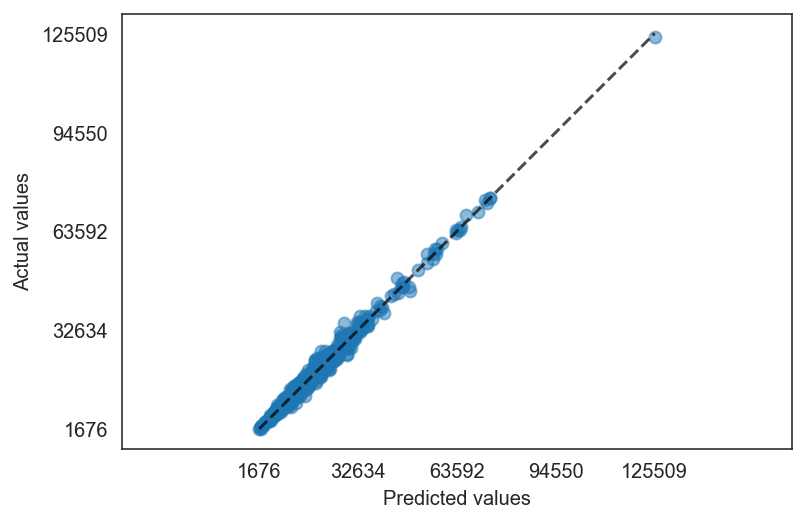

In [37]:
PredictionErrorDisplay.from_predictions(
    y_train,
    lr_train_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)
plt.show()

## 4.2. Evaluation on the Test Sample

### Test Sample correction

**Note:** Since in the Test Sample appeared a previously unknown model `Escort`, let's replace it with the most common `model` of the `brand` `Ford` - `Focus`.

In [38]:
X_test.loc[(X_test.model.str.lower().str.contains('escort')),'model'] = 'Focus'

In [39]:
lr_test_pred = pipeline.predict(X_test)
lr_rmse = mean_squared_error(y_true=y_test, y_pred = lr_test_pred, squared=False)
lr_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=lr_test_pred)

print (f'LR RMSE test = {round(lr_rmse, 3)}')
print (f'LR MAPE test = {lr_mape}')
print (f'LR SCORE = {round(pipeline.score(X_test, y_test), 3)}')

LR RMSE test = 1924.567
LR MAPE test = 0.07005690169341372
LR SCORE = 0.962


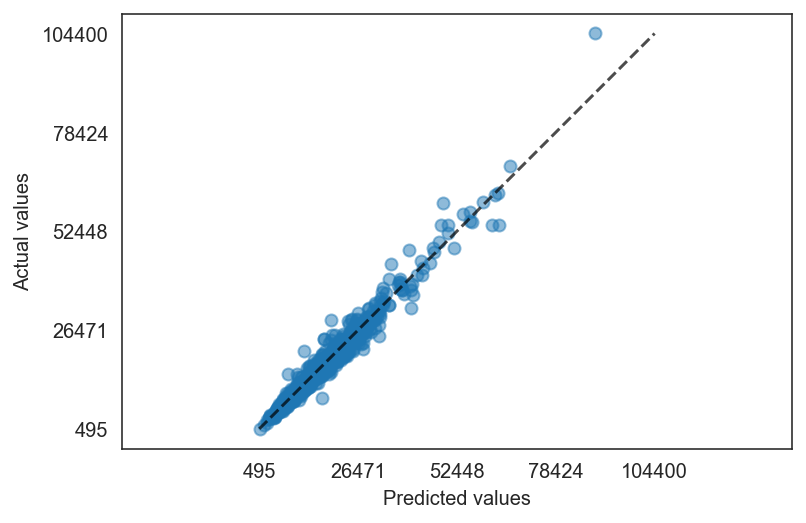

In [40]:
PredictionErrorDisplay.from_predictions(
    y_test,
    lr_test_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)
plt.show()

## 4.3. Evaluation on the Whole Sample (as a Train Sample)

**Note:** After discovering the optinal model with optimal parameters, let's implement it on the whole available sample to train the model better.

### `.fit(X, y)`

In [41]:
%%time
pipeline.fit(X, y)

[19:51:08] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 27min 23s, sys: 8.74 s, total: 27min 32s
Wall time: 7min 27s


Pipeline(steps=[('preprocessing',
                 DataFrameMapper(df_out=True, drop_cols=[],
                                 features=[(['year'], SimpleImputer()),
                                           (['mileage'], SimpleImputer()),
                                           (['tax'], SimpleImputer()),
                                           (['mpg'], SimpleImputer()),
                                           (['engineSize'], SimpleImputer()),
                                           (['transmission'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['brand'],
                                            OneHotEncoder(handle_unknown='ignore')),
                                           (['model'],
                                            OneH...
                              eval_metric=None, feature_types=None, gamma=None,
                              gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=500,
                              n_jobs=None, num_parallel_tree=None,
                              objective='reg:linear', ...))])

In [42]:
lr_train_pred = pipeline.predict(X)
lr_rmse = mean_squared_error(y_true=y, y_pred = lr_train_pred, squared=False)
lr_mape = mean_absolute_percentage_error(y_true=y, y_pred=lr_train_pred)

print (f'LR RMSE train = {round(lr_rmse, 3)}')
print (f'LR MAPE train = {lr_mape}')
print (f'LR SCORE = {round(pipeline.score(X, y), 3)}')

LR RMSE train = 1195.022
LR MAPE train = 0.0545233149563374
LR SCORE = 0.985


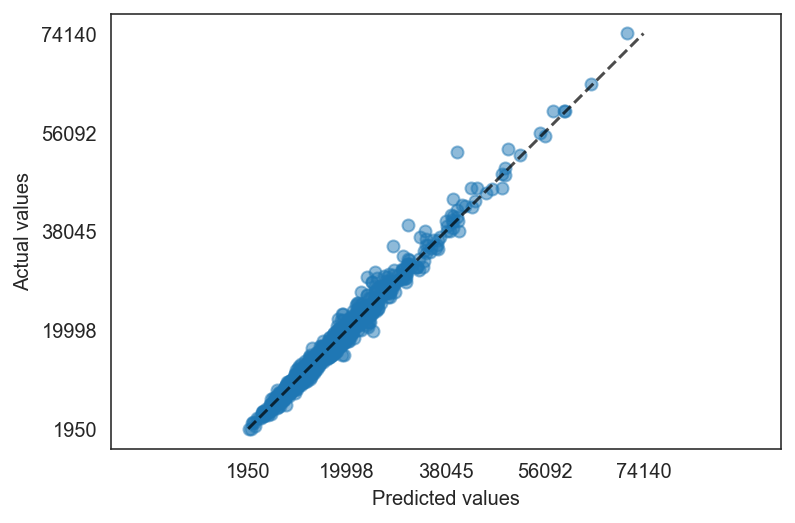

In [43]:
PredictionErrorDisplay.from_predictions(
    y,
    lr_train_pred,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
)
plt.show()

# 5. Prediction of `car_test.csv`

## 5.1. Basic

In [44]:
car_test = pd.read_csv('car_test.csv')
car_test.sample(3)

,id,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
1395,1395,focus,Focus,2019.0,Manual,9929 km,Petrol,NaN,NaN,1.0,NaN
2966,2966,vw,Golf,2019.0,Manual,4000 km,Petrol,145.0,45.6,1.5,NaN
9448,9448,focus,Focus,2019.0,Manual,12892 km,Petrol,NaN,NaN,1.0,NaN


In [25]:
car_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9578 non-null   int64  
 1   brand         9578 non-null   object 
 2   model         9578 non-null   object 
 3   year          9578 non-null   float64
 4   transmission  9578 non-null   object 
 5   mileage       9578 non-null   object 
 6   fuelType      9578 non-null   object 
 7   tax           8342 non-null   float64
 8   mpg           8745 non-null   float64
 9   engineSize    9578 non-null   float64
 10  tax(£)        403 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 823.2+ KB


## 5.2. Values type

### `mileage`

In [45]:
# getting rid of 'km' in mileage
car_test.mileage = car_test.mileage.str.replace(" km", '').astype(int)

### `model`

In [46]:
# getting rid of space in model
car_test.model = car_test.model.str.strip()

**Note:** `car_test` contains a previously unknown Mercedes-Benz `model` - `230`. Let's replace it with another.

In [47]:
car_test.loc[(car_test.model.str.lower().str.contains('230')),'model'] = '220'

### `year`

In [48]:
car_test.year = car_test.year.astype(int)

### `brand`

**Note:** `car_test` contains the error - `Focus` is not `brand`, `Ford` is `brand`.

In [49]:
car_test.brand.unique()

array(['vw', 'audi', 'vauxhall', 'Mercedes-Benz', 'Hyundai', 'skoda',
       'ford', 'bmw', 'toyota', 'focus'], dtype=object)

In [50]:
car_test.loc[(car_test.brand.str.lower().str.contains('focus')),'brand'] = 'ford'

## 5.3. Prediction of `car_test.csv` and submission

In [55]:
lr_car_test_pred = pipeline.predict(car_test)

In [56]:
lr_car_test_pred

array([14482.946, 44155.715,  6488.738, ..., 16582.428, 32006.37 ,
       13579.083], dtype=float32)

In [57]:
submission = pd.DataFrame(data = lr_car_test_pred, index = car_test.index, 
             columns=['price']).reset_index().rename(columns={"index": "id"}).set_index('id')
submission

,price
id,
0,14482.946289
1,44155.714844
2,6488.737793
3,10628.027344
4,21193.917969
...,...
9573,11855.132812
9574,10001.049805
9575,16582.427734


In [58]:
submission.to_csv('submission.csv')